# Bank Note Authentication 

## Abstract:
    
Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.

## Data Set Information:
    
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an 
industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and
distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool
were used to extract features from images.

Source: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

## Attribute Information:
    
variance - variance of Wavelet Transformed image (continuous)
skewness - skewness of Wavelet Transformed image (continuous)
curtosis - curtosis of Wavelet Transformed image (continuous)
entropy - entropy of image (continuous)
class - class (integer)

In [126]:
import warnings
warnings.filterwarnings('ignore')

In [127]:
#let us start by importing the relevant libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
#reading the banknote dataset in a dataframe. 
columns = ["var","skewness","curtosis","entropy","class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/\
data_banknote_authentication.txt",index_col=False, names = columns)

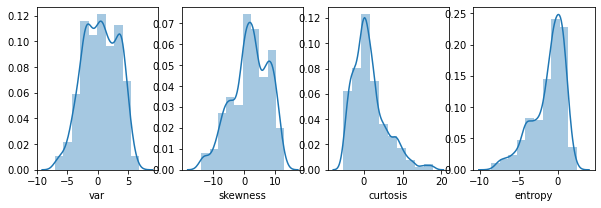

In [129]:
#Let us use seaborn distplot to analyze the distribution of our columns
f, ax = plt.subplots(1, 4, figsize=(10,3))
vis1 = sns.distplot(df["var"],bins=10, ax= ax[0])
vis2 = sns.distplot(df["skewness"],bins=10, ax=ax[1])
vis3 = sns.distplot(df["curtosis"],bins=10, ax= ax[2])
vis4 = sns.distplot(df["entropy"],bins=10, ax=ax[3])
f.savefig('subplot.png')


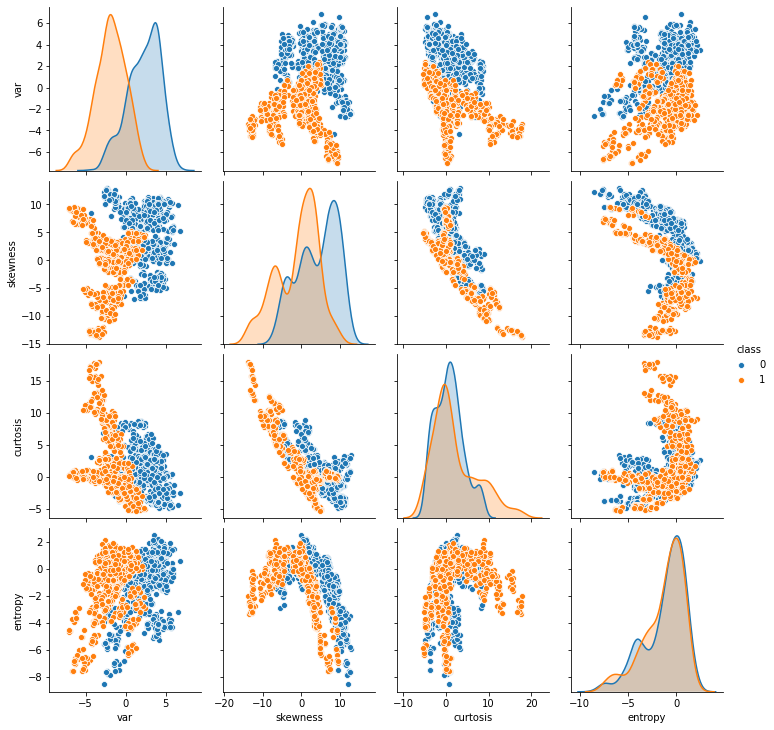

In [130]:
# now that we have a univariate distribution done, we can go ahead and determine the pairwise relationships in the dataset.
# we use the sns.pairplpot. Analyze the distrbutions.
# also, we add hue to see these distrbutions with the class col
sns.pairplot(df, hue="class")

In [131]:
# we separate the target variable (class) and save it in the y variable. Also the X contains the independant variables.
X = df.iloc[:,0:4]
y = df.iloc[:,4]

In [132]:
df.iloc[:,0:4].head()

var  skewness  curtosis  entropy
0  3.62160    8.6661   -2.8073 -0.44699
1  4.54590    8.1674   -2.4586 -1.46210
2  3.86600   -2.6383    1.9242  0.10645
3  3.45660    9.5228   -4.0112 -3.59440
4  0.32924   -4.4552    4.5718 -0.98880

In [133]:
df.iloc[:,4].head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [ ]:
df.shape

In [134]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [135]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

## GL implementation

In [ ]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

In [ ]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

In [ ]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [ ]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs

In [ ]:
# generating dimensionally reduced datasets
w = np.hstack((eigen_pairs[0][1].reshape(4,1), 
                      eigen_pairs[1][1].reshape(4,1)))

w

In [ ]:
X_sd_pca = X_train_sd.dot(w)
X_test_sd_pca = X_test_sd.dot(w)

In [ ]:
X_train_sd.shape, w.shape, X_sd_pca.shape, X_test_sd_pca.shape

In [ ]:
### We will use Logistic regression, RandomForest and AdaBoost

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_sd, y_train)
print ('Before PCA score', model.score(X_test_sd, y_test))

model.fit(X_sd_pca, y_train)
print ('After PCA score', model.score(X_test_sd_pca, y_test))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_sd, y_train)
print ('Before PCA score', clf.score(X_test_sd, y_test))

clf.fit(X_sd_pca, y_train)
print ('After PCA score', clf.score(X_test_sd_pca, y_test))


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train_sd, y_train)
print ('Before PCA score', model.score(X_test_sd, y_test))

model.fit(X_sd_pca, y_train)
print ('After PCA score', model.score(X_test_sd_pca, y_test))

### In the given dataset we trained models with the orginal and dimensionally reduced datsets. The effects of PCA can be clearly appreciated on a fairly large datsaset. The learners are encouraged to try the above with various large datsets out there.

In [136]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_sd_pca = pca.fit_transform(X_train_sd)

In [137]:
def scree_plot(pca):
    
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
     
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

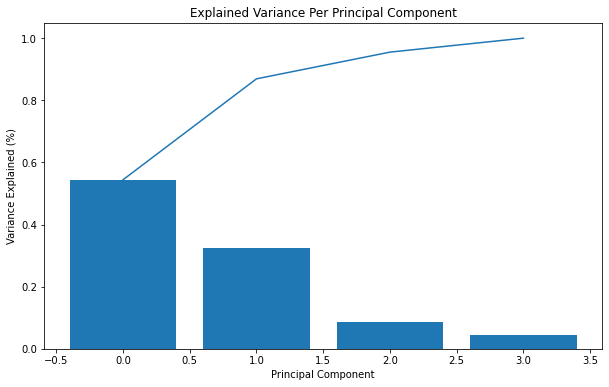

In [138]:
scree_plot(pca)

In [139]:
pca = PCA(n_components=2)
X_train_sd_pca = pca.fit_transform(X_train_sd)

In [140]:
X_train_sd_pca

array([[ 0.24352667, -0.66076714],
       [-2.33969928, -0.13044949],
       [-1.25380075,  0.00827162],
       ...,
       [-1.33103962, -0.12962976],
       [-1.52134953,  0.68899534],
       [ 0.57565219,  0.1101247 ]])

In [141]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=300)
clf.fit(X_train_sd, y_train)
print ('Before PCA score', clf.score(X_test_sd, y_test))

clf.fit(X_sd_pca, y_train)
print ('After PCA score', clf.score(X_test_sd_pca, y_test))


Before PCA score 0.9927272727272727
After PCA score 0.8472727272727273


In [142]:
def pca_weights(pca, i):
    weight_map = {}
    for counter, feature in enumerate(X.columns):
        weight_map[feature] = pca.components_[i][counter]
        
    return weight_map

In [143]:
weights = pca_weights(pca,1)

weights

{'var': -0.7567470899235132,
 'skewness': 0.045753301312525946,
 'curtosis': 0.15345343767665137,
 'entropy': -0.6337921739628201}

In [144]:
weights = pca_weights(pca,0)

weights

{'var': -0.24410388167841746,
 'skewness': -0.6391411302035547,
 'curtosis': 0.6137845396808871,
 'entropy': 0.3939294981089556}